In [2]:
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
directory = 'Small_audio_sample'
hop_length = 1024
n_fft = 2048

122219.wav


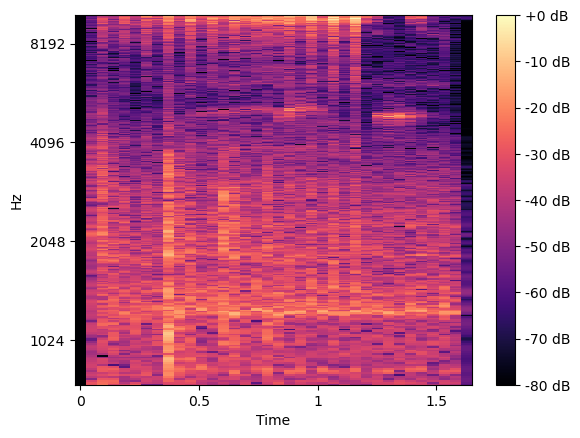

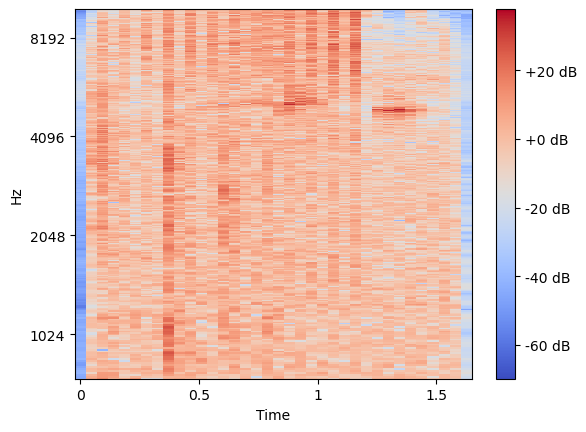

119884.wav


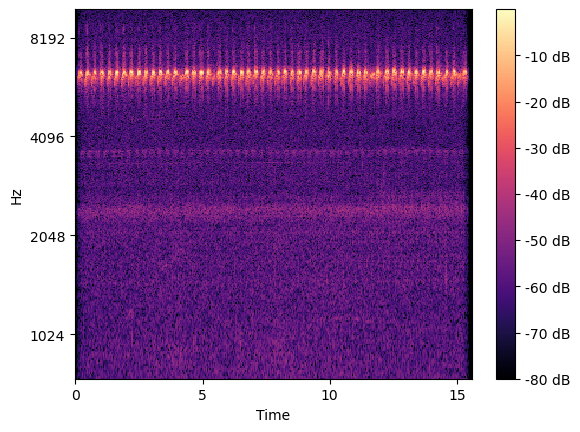

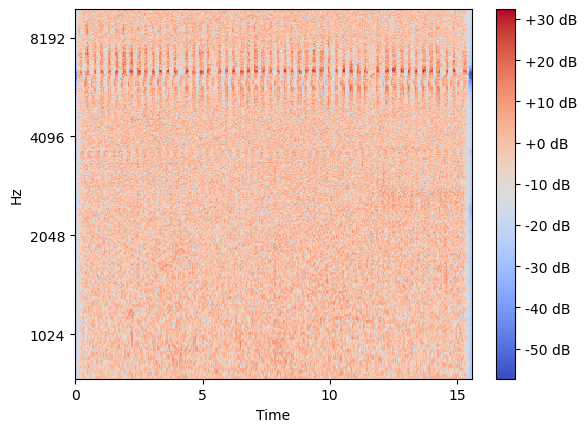

122147.wav


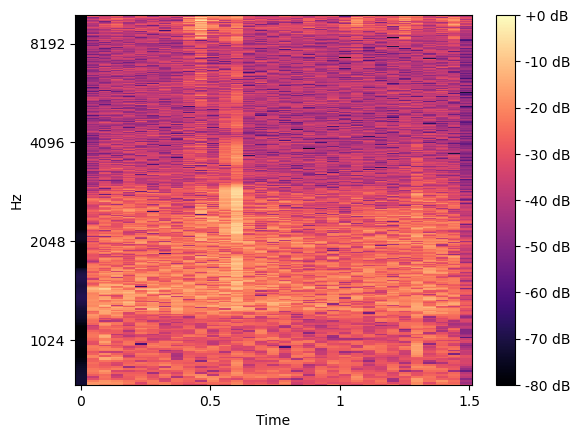

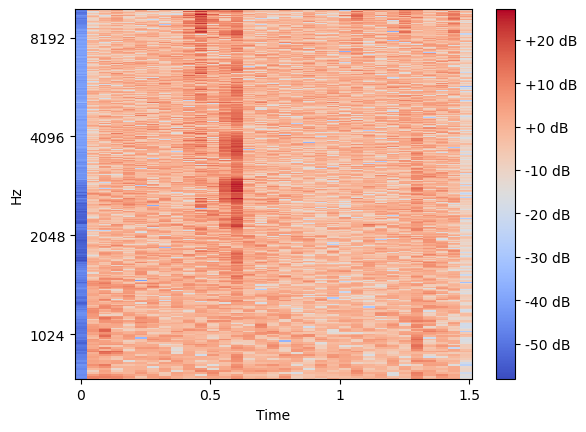

122218.wav


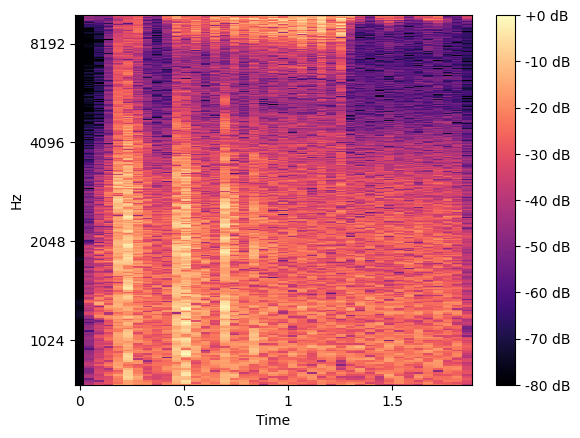

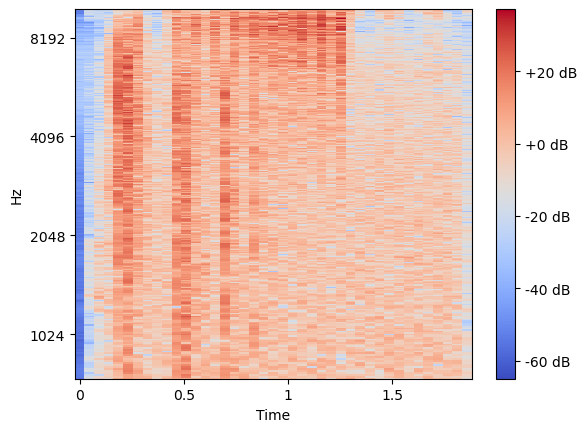

118960_mole.wav


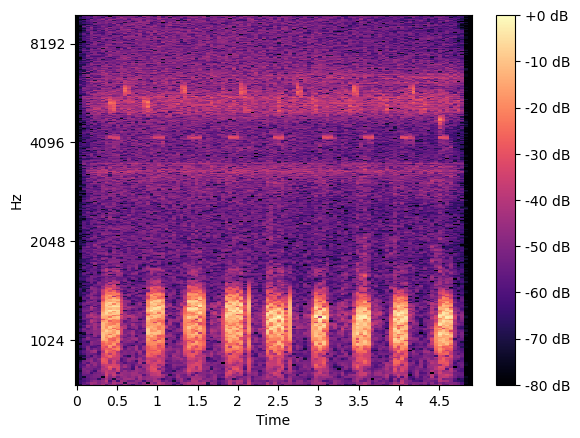

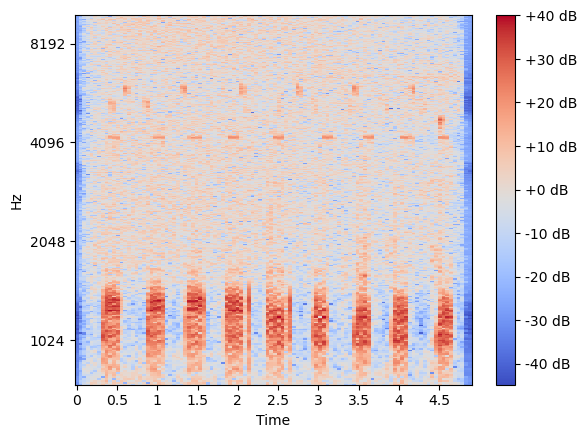

122140.wav


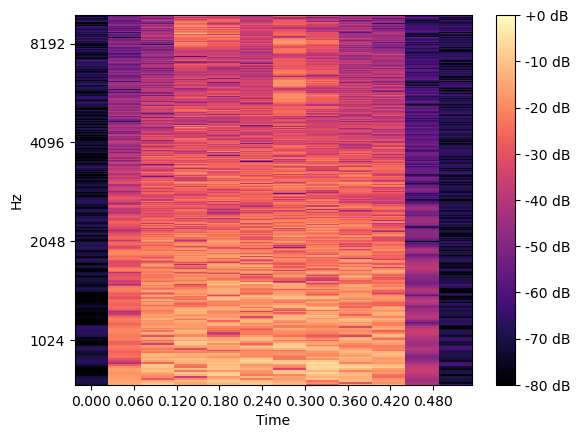

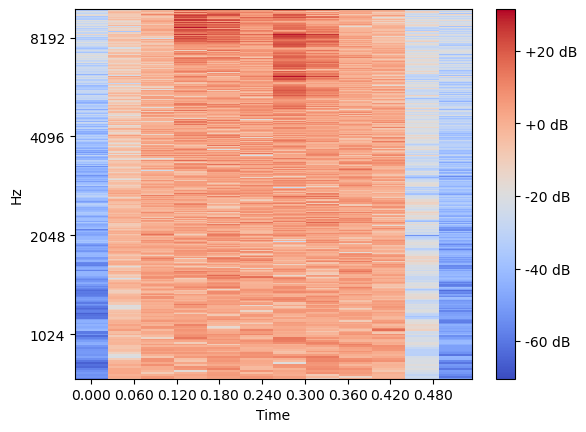

122340.wav


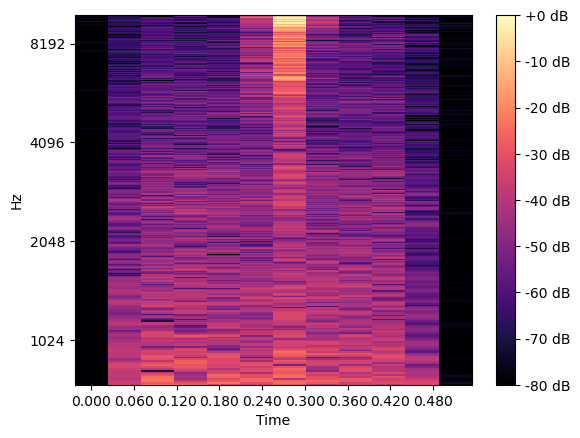

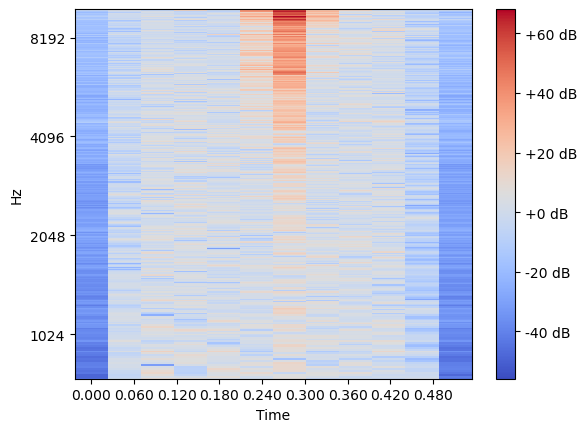

126899.wav


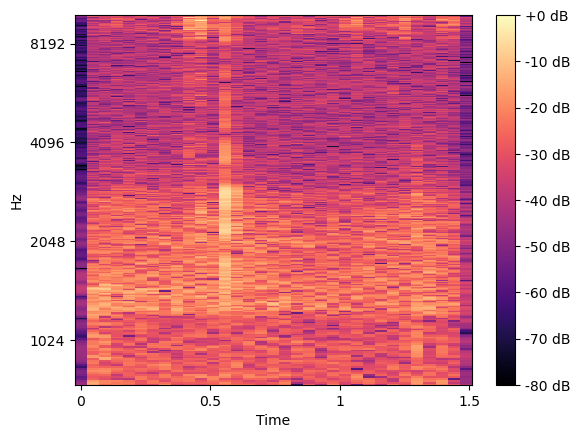

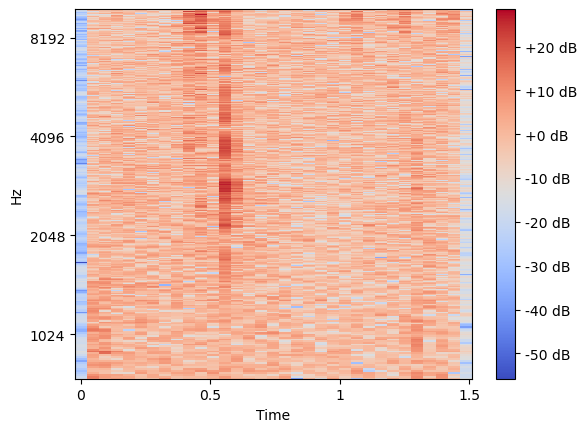

122221.wav


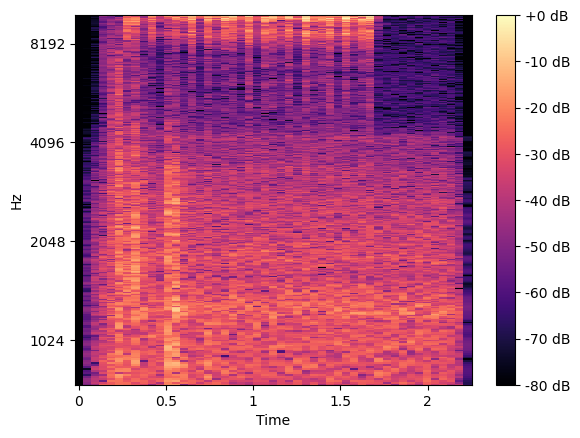

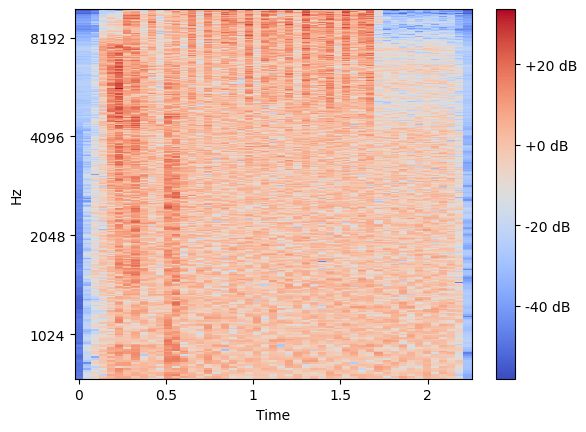

122246.wav


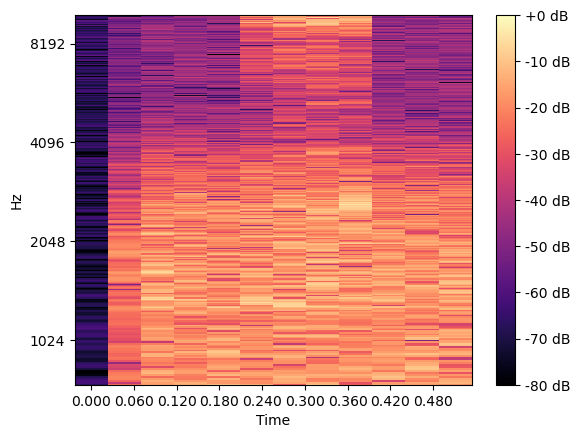

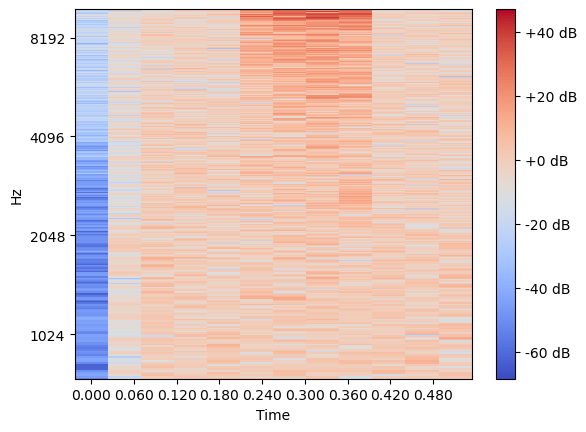

122247.wav


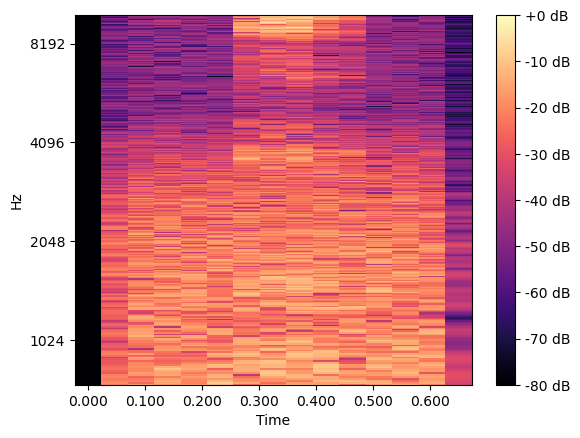

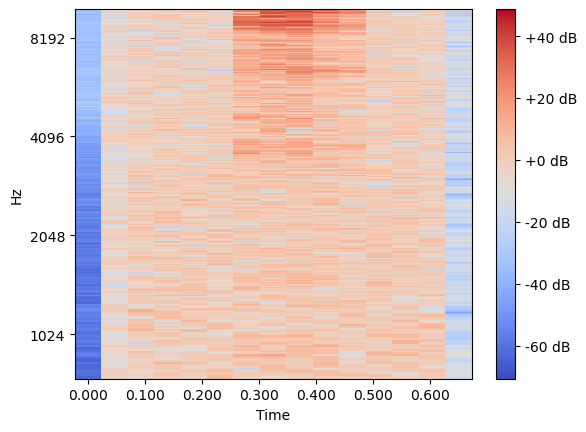

122245.wav


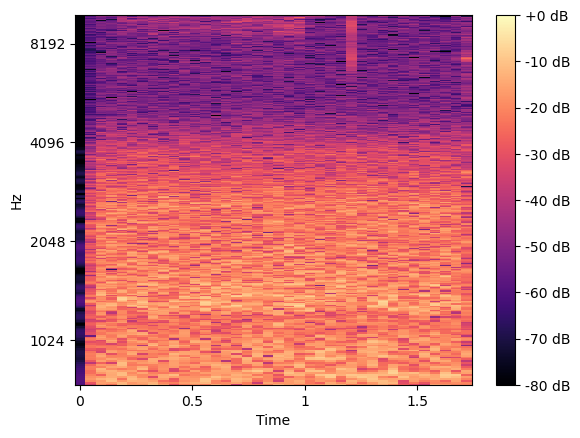

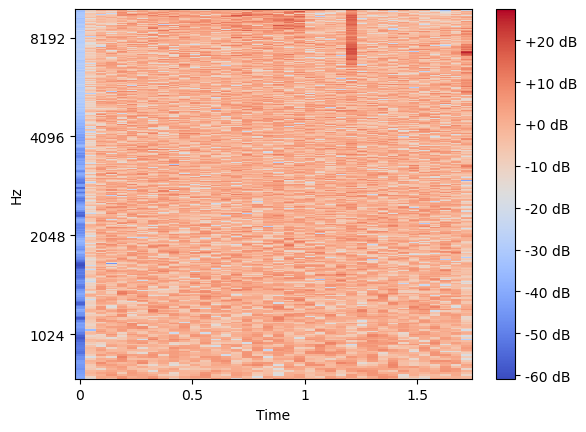

122278.wav


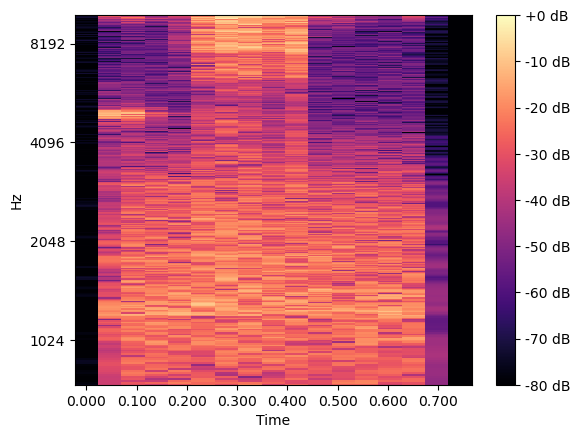

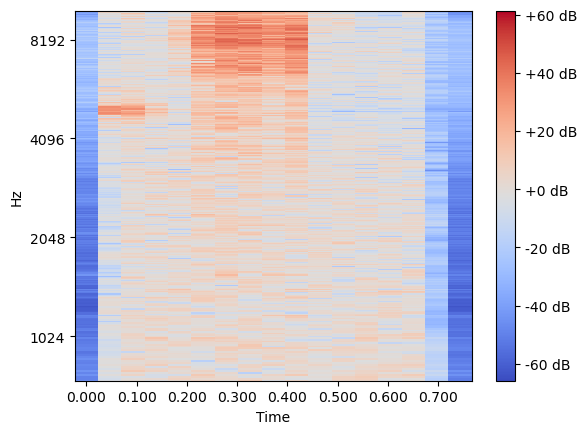

122283.wav


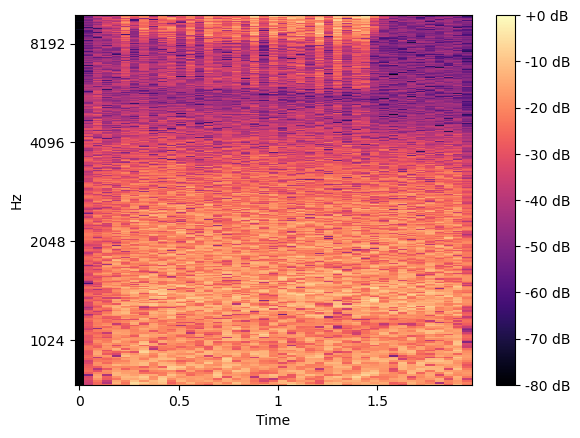

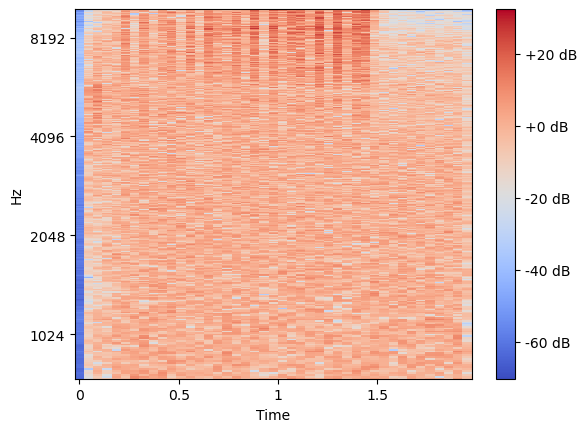

122269.wav


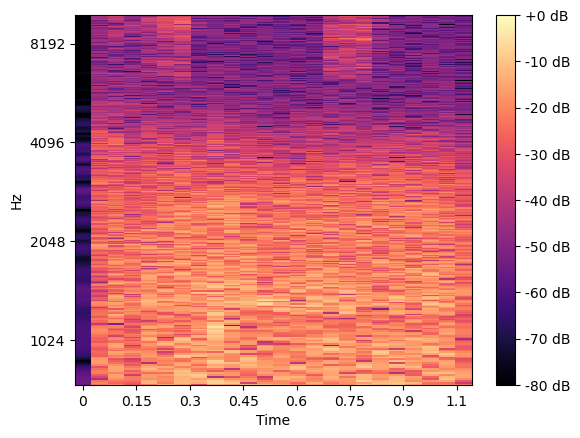

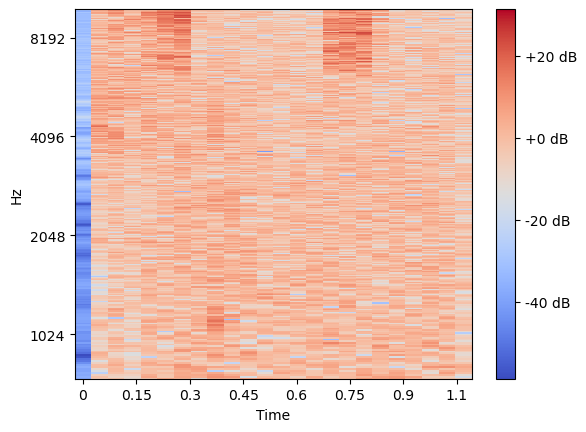

122280.wav


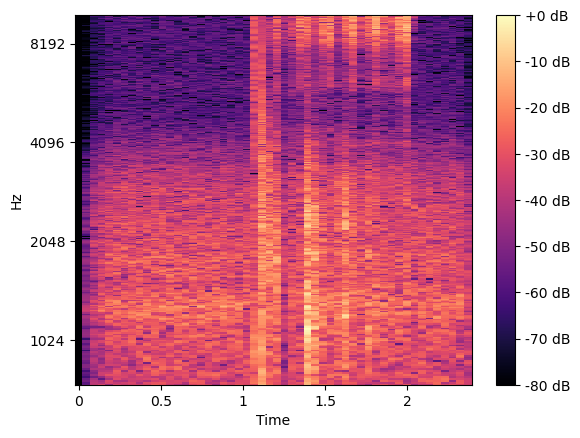

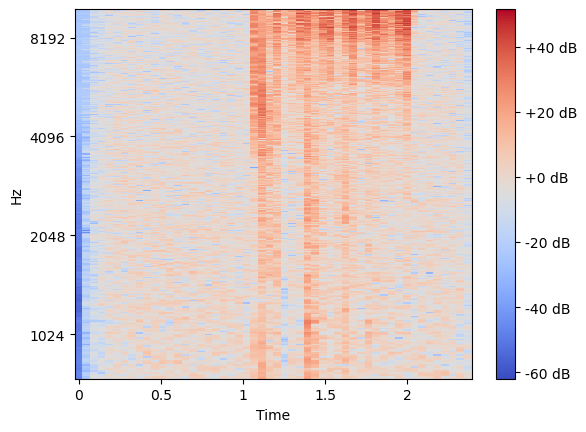

122267.wav


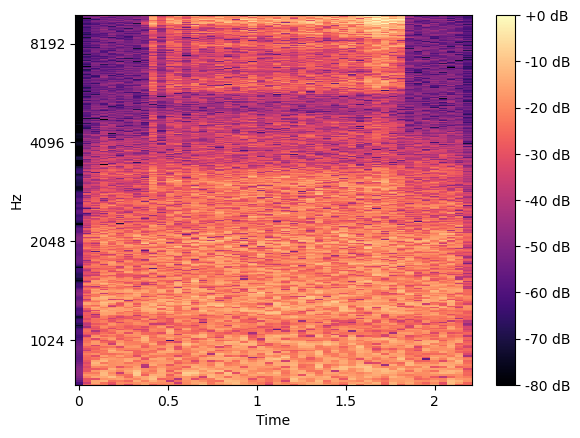

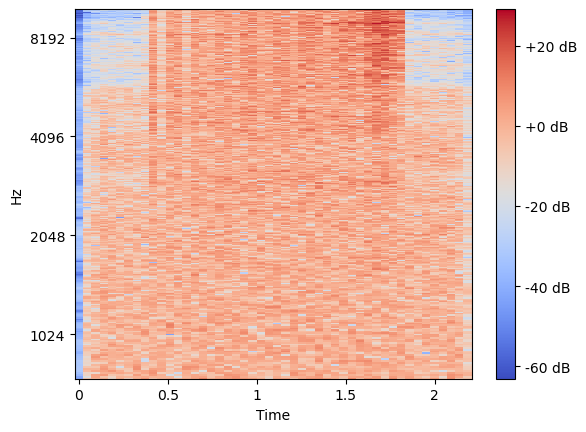

122264.wav


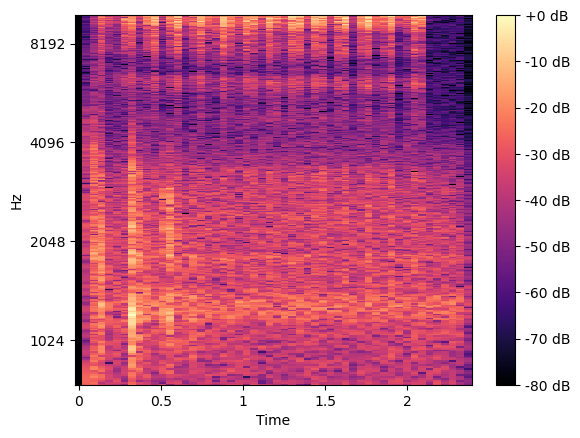

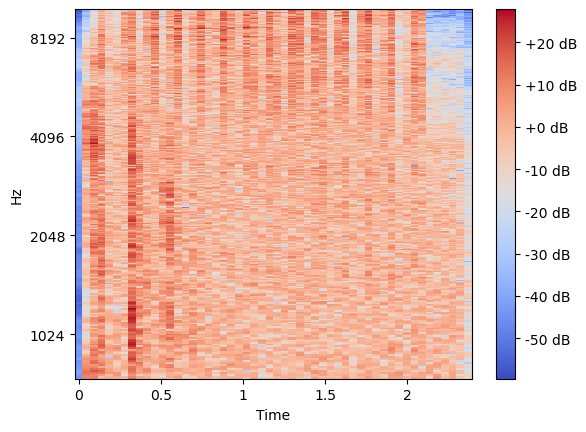

122270.wav


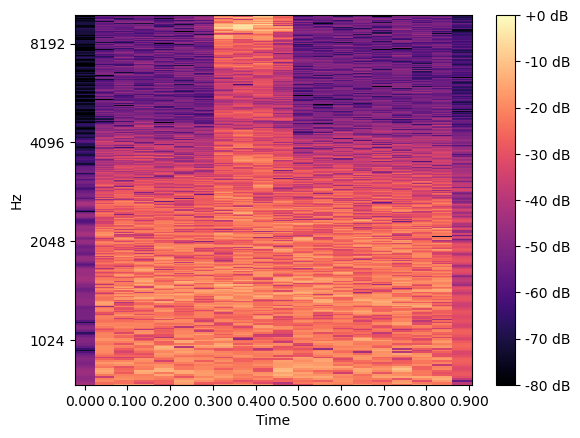

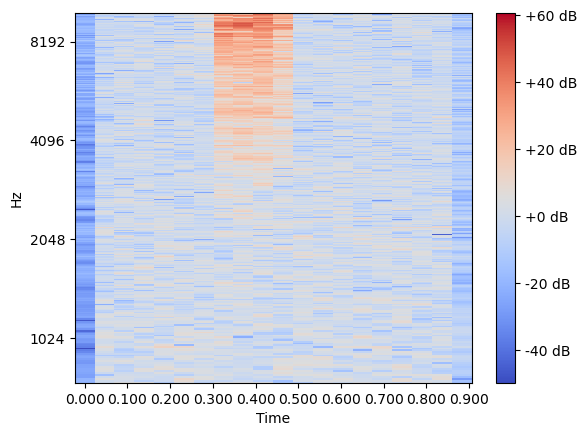

122338.wav


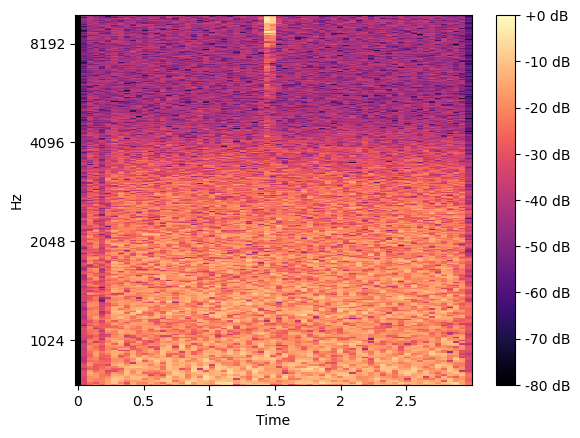

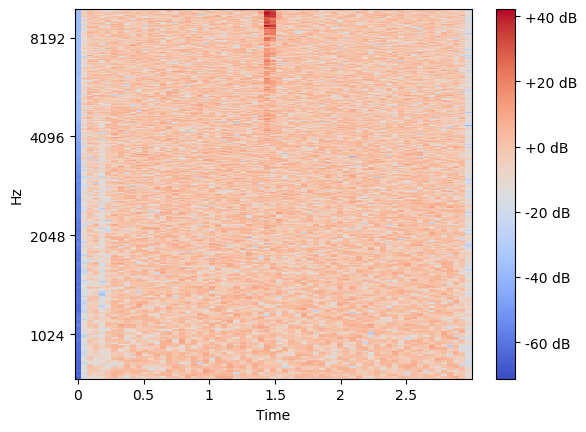

122339.wav


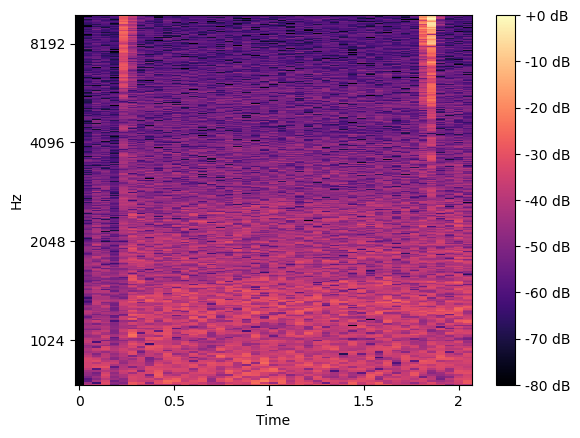

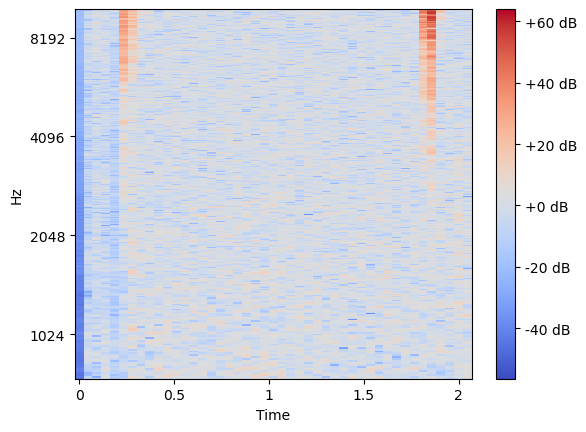

122275.wav


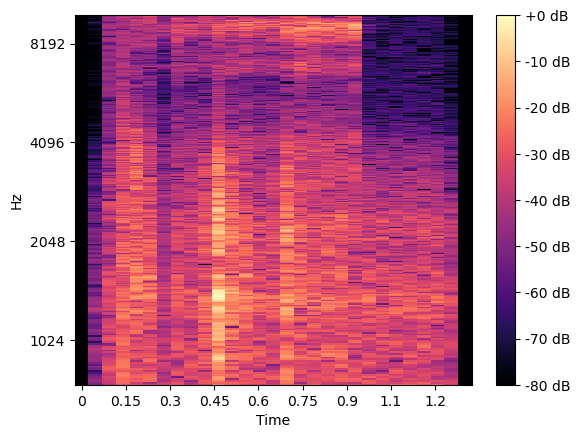

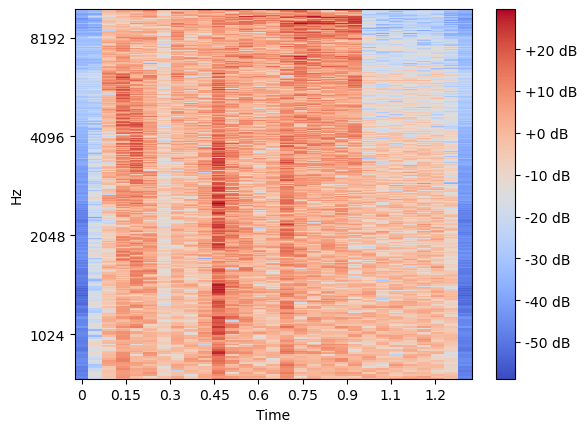

122249.wav


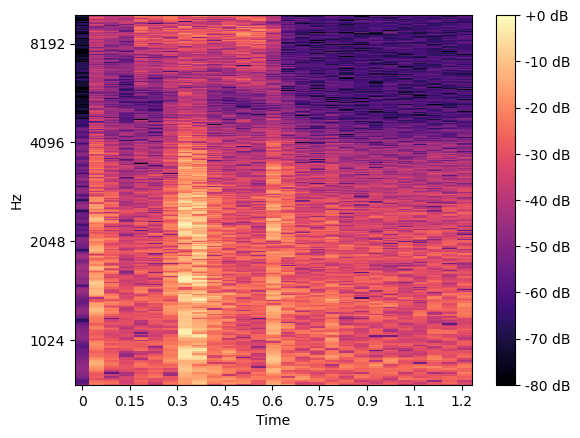

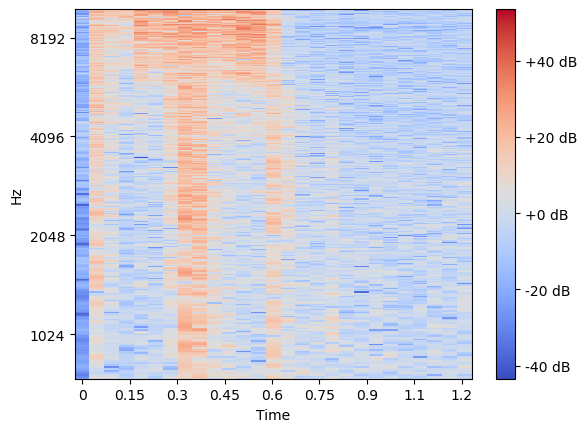

122248.wav


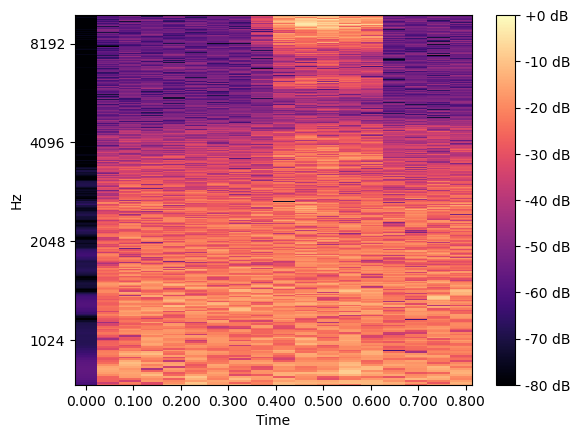

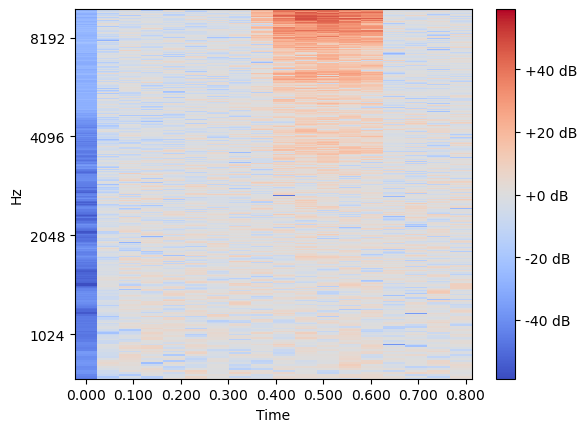

122263.wav


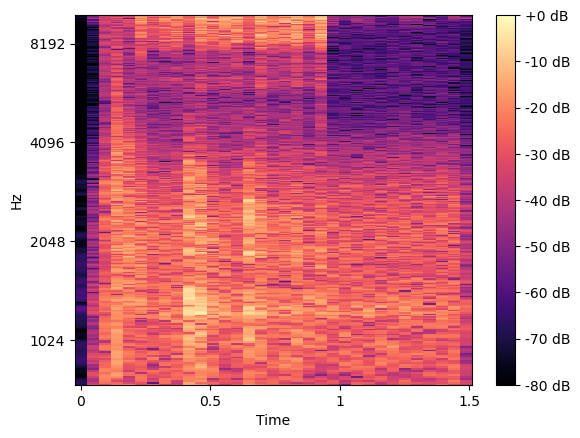

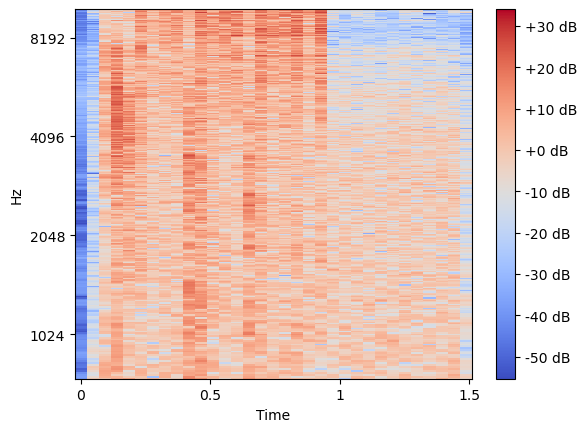

122239.wav


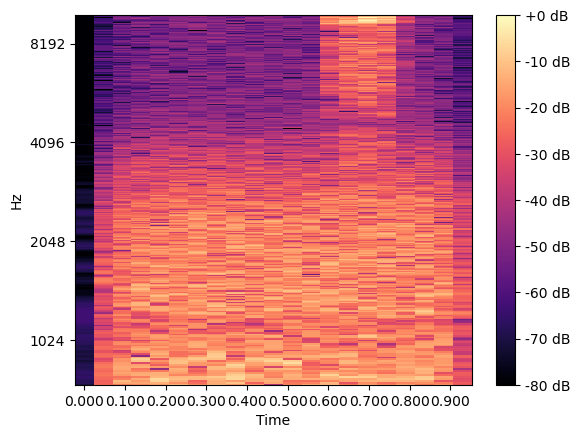

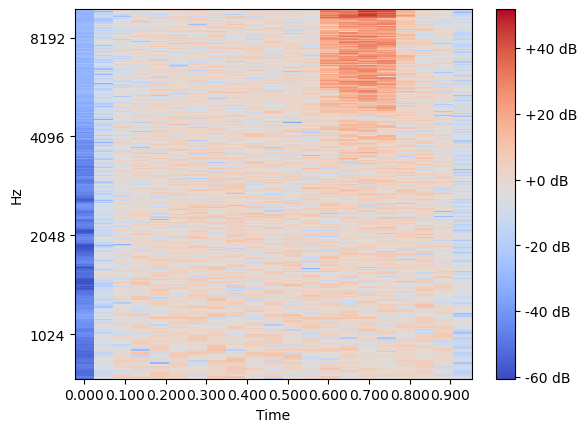

131535.wav


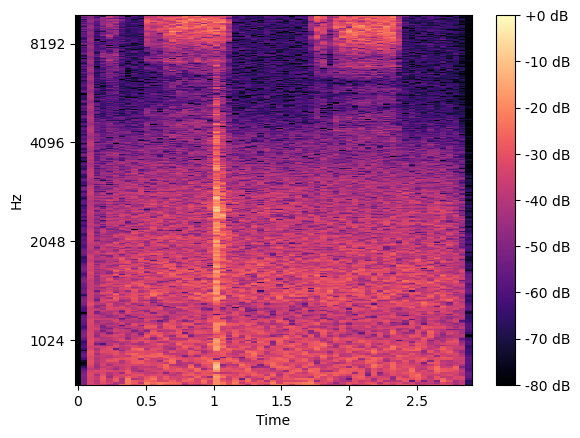

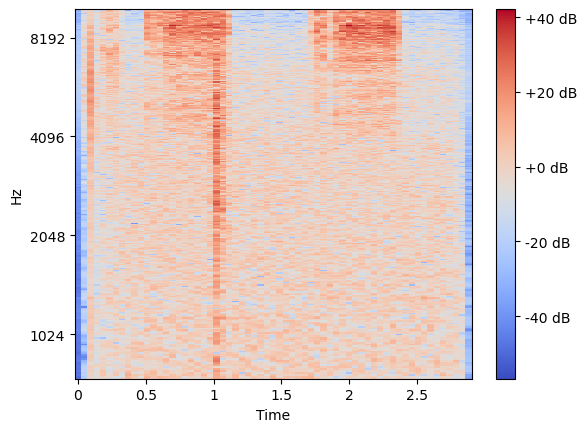

122206.wav


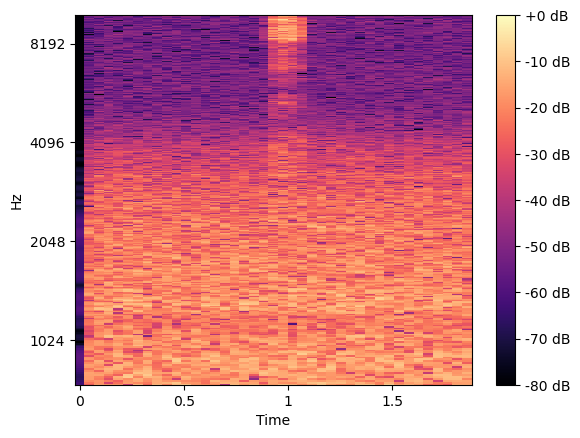

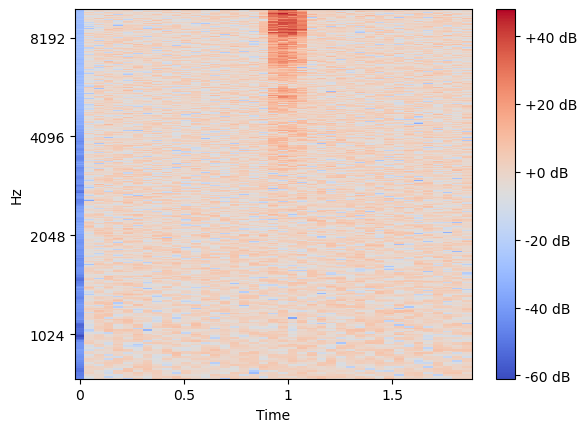

122377.wav


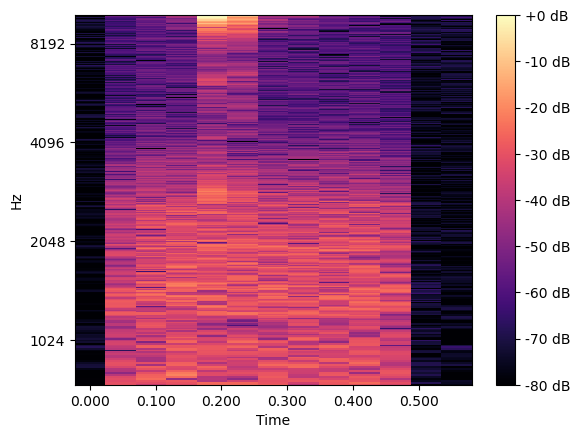

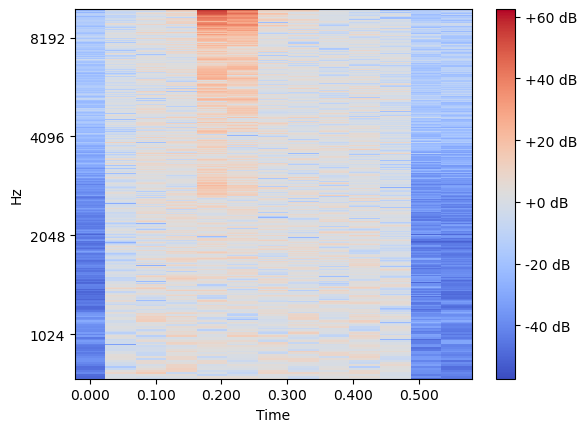

122375.wav


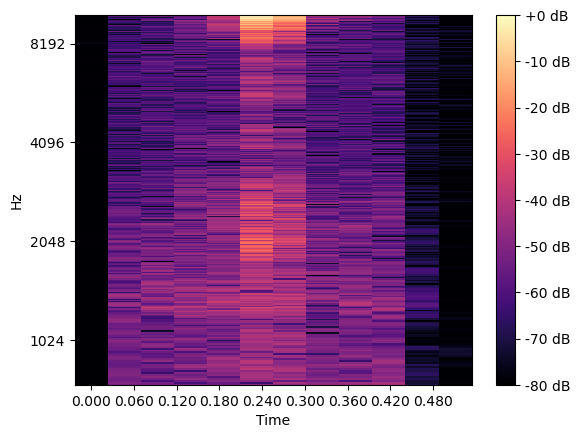

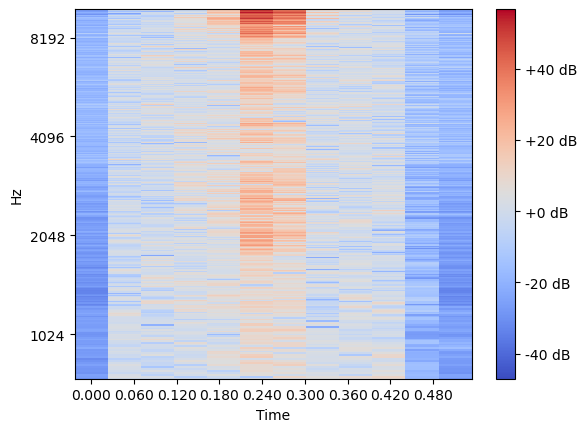

In [43]:
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        print(filename)
        D = remove_low_freq(remove_Talking(f))
        plot_no_low(D)
        plot_no_low(D, True)
        #plot_no_low(clean(DB))

In [4]:
def remove_Talking(f):
    chirp_song, sr = librosa.load(f)
    split=librosa.effects.split(chirp_song, top_db=60)
    chirp_song_split=chirp_song[split[1,0]:split[1,1]]
    return chirp_song_split

In [42]:
def plot_song(song):
    hop_length = 1024
    n_fft = 2048
    D = np.abs(librosa.stft(song, n_fft=n_fft,  hop_length=hop_length))
    DB = librosa.amplitude_to_db(D, ref=np.max)
    librosa.display.specshow(DB, hop_length=hop_length, x_axis='time', y_axis='log');
    plt.colorbar(format='%+2.0f dB');
    plt.show()
    return None

def plot_array(DB):
    hop_length = 1024
    n_fft = 2048
    #DB = librosa.amplitude_to_db(D, ref=np.max)
    librosa.display.specshow(DB, hop_length=hop_length, x_axis='time', y_axis='log');
    plt.colorbar(format='%+2.0f dB');
    plt.show()
    return None

def plot_no_low(D,clean = False):
    hop_length = 1024
    n_fft = 2048
    DB = librosa.amplitude_to_db(D, ref=np.max)
    if clean:
        DB = clean_DB(DB)
    librosa.display.specshow(DB, hop_length=hop_length, x_axis='time', y_axis='log');
    plt.ylim(750,10000)
    plt.colorbar(format='%+2.0f dB');
    plt.show()
    return None
    

In [17]:
def remove_low_freq(song):
    D = np.abs(librosa.stft(song, n_fft=n_fft,  hop_length=hop_length))
    D=D[64:]
    return D

In [7]:
def zero_low_freq(song):
    D = np.abs(librosa.stft(song, n_fft=n_fft,  hop_length=hop_length))
    D[:65]=0
    return D

In [41]:
def clean_DB(DB):
    DBclean = np.zeros(DB.shape)
    for x in range(0,DB.shape[0]):
        med = np.median(DB[x, :])
        DBclean[x, :] = DB[x, :]-med
    return DBclean